In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv(r'E:\ML\DATASETS ALGO\LINEARR\insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
age_bins=[17,30,50,65]
age_cat=['Young','Adult','old']
df['Age_category']=pd.cut(df['age'],bins=age_bins,labels=age_cat)

<AxesSubplot:xlabel='region', ylabel='charges'>

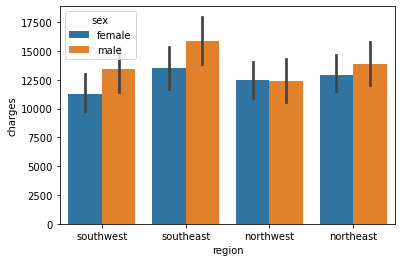

In [16]:
import seaborn as sns
sns.barplot(x='region',y='charges',data=df,hue='sex')

<AxesSubplot:xlabel='Age_category', ylabel='charges'>

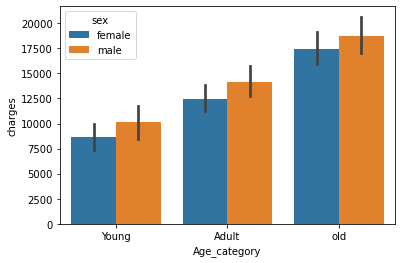

In [9]:
sns.barplot(x='Age_category',y='charges',data=df,hue='sex')

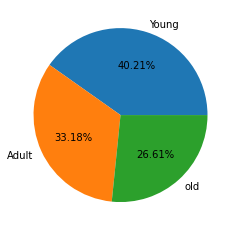

In [10]:
import matplotlib.pyplot as plt
plt.pie(df['Age_category'].value_counts(),autopct='%0.2f%%',labels=df['Age_category'].unique())
plt.show()

<AxesSubplot:xlabel='age', ylabel='bmi'>

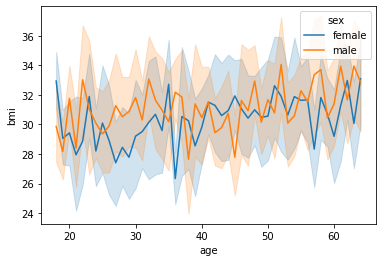

In [13]:
sns.lineplot(x='age',y='bmi',data=df,hue='sex')

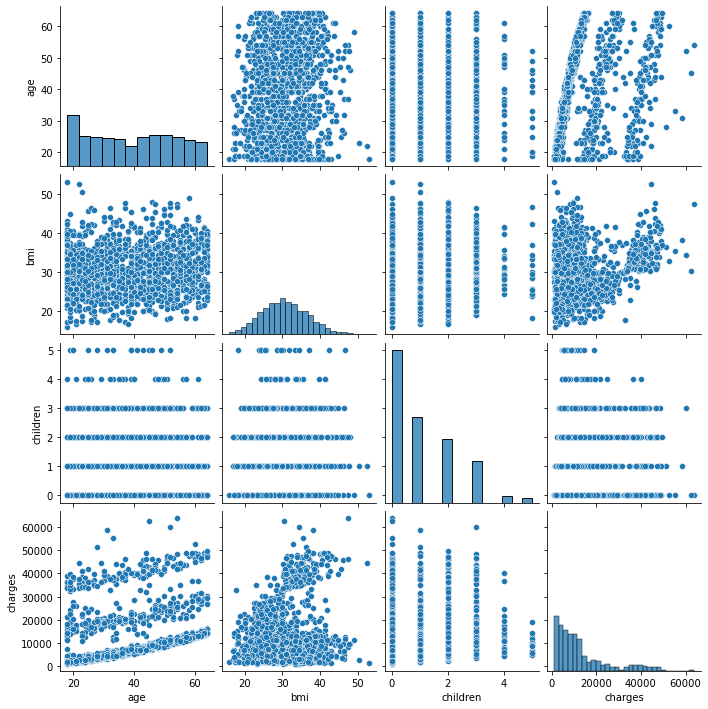

In [14]:
sns.pairplot(df)

In [20]:
#Encoding
for i in df.columns:
    if df[i].dtype == object:
        print(i) 
        print(df[i].unique())


sex
['female' 'male']
smoker
['yes' 'no']
region
['southwest' 'southeast' 'northwest' 'northeast']


In [21]:
# Sex,smoker,Age_category = labelEncoding
# region =  get_dummies or OneHOtEncoding

In [22]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
encode = LabelEncoder()
df['sex']=encode.fit_transform(df['sex'])

In [23]:
df['smoker'] = encode.fit_transform(df['smoker'])
df['Age_category'] = encode.fit_transform(df['Age_category'])

In [66]:
new_df=pd.get_dummies(df,columns=['region'],drop_first=True)

In [67]:
new_df.head()


,age,sex,bmi,children,smoker,charges,Age_category,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,1,0,0,1
1,18,1,33.770,1,0,1725.55230,1,0,1,0
2,28,1,33.000,3,0,4449.46200,1,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


In [68]:
new_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'Age_category',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [69]:
new_df=new_df[['age', 'sex', 'bmi', 'children', 'smoker', 'Age_category',
       'region_northwest', 'region_southeast', 'region_southwest', 'charges']]

In [70]:
new_df.head()

,age,sex,bmi,children,smoker,Age_category,region_northwest,region_southeast,region_southwest,charges
0,19,0,27.900,0,1,1,0,0,1,16884.92400
1,18,1,33.770,1,0,1,0,1,0,1725.55230
2,28,1,33.000,3,0,1,0,1,0,4449.46200
3,33,1,22.705,0,0,0,1,0,0,21984.47061
4,32,1,28.880,0,0,0,1,0,0,3866.85520


<AxesSubplot:>

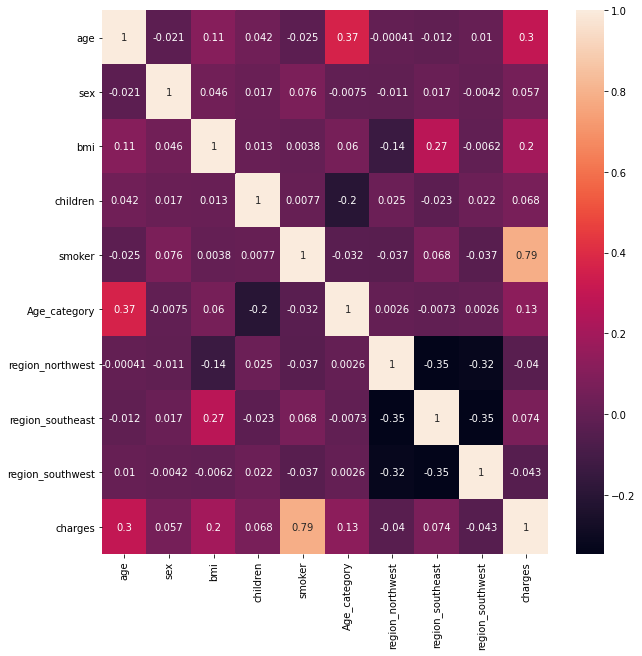

In [71]:
plt.figure(figsize=(10,10))
sns.heatmap(new_df.corr(),annot=True)

In [72]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(new_df.iloc[:,0:9],new_df.iloc[:,-1],test_size=0.2,random_state=2)

In [73]:
from sklearn.preprocessing import PowerTransformer
boxcox=PowerTransformer(method='box-cox')
xtrain_bxcx = boxcox.fit_transform(xtrain+0.000001)
xtest_bxcx = boxcox.fit_transform(xtest+0.000001)

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(xtrain_bxcx,ytrain)
y_pred_bxcx = lr.predict(xtest_bxcx)

In [75]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
r2_score(ytest,y_pred_bxcx)

0.7400079683006923

In [76]:
mean_absolute_error(ytest,y_pred_bxcx)

4420.150125728661

In [77]:
mean_squared_error(ytest,y_pred_bxcx)

39045801.37711108

In [78]:
xtest_bxcx[1]

array([ 1.11503597, -0.97785703, -0.04415159, -1.04412602, -0.50814955,
        0.85387761, -0.58884095, -0.60033831, -0.55436186])

In [79]:
# ytest.values[1]
lr.predict([[ 1.11503597, -0.97785703, -0.04415159, -1.04412602, -0.50814955,
        0.85387761, -0.58884095, -0.60033831, -0.55436186]])

array([12745.84698867])

In [80]:
ytest.values[1]

11286.5387

In [81]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(lr,new_df.iloc[:,0:9],new_df.iloc[:,-1],scoring='r2',cv=10))

0.7467397591210465